In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
ruta_archivo = "../Datos/transformed_data.csv"

df = pd.read_csv(ruta_archivo)
# Eliminar las columnas "Height" y "Weight"
df = df.drop(["Height", "Weight"], axis=1)
df

onehot__Gender_Female  onehot__Gender_Male  \
0                       1.0                  0.0   
1                       1.0                  0.0   
2                       0.0                  1.0   
3                       0.0                  1.0   
4                       0.0                  1.0   
...                     ...                  ...   
2106                    1.0                  0.0   
2107                    1.0                  0.0   
2108                    1.0                  0.0   
2109                    1.0                  0.0   
2110                    1.0                  0.0   

      onehot__family_history_with_overweight_no  \
0                                           0.0   
1                                           0.0   
2                                           0.0   
3                                           1.0   
4                                           1.0   
...                                         ...   
2106                                        0.0   
2107                                        0.0   
2108                                        0.0   
2109                                        0.0   
2110                                        0.0   

      onehot__family_history_with_overweight_yes  onehot__FAVC_no  \
0                                            1.0              1.0   
1                                            1.0              1.0   
2                                            1.0              1.0   
3                                            0.0              1.0   
4                                            0.0              1.0   
...                                          ...              ...   
2106                                         1.0              0.0   
2107                                         1.0              0.0   
2108                                         1.0              0.0   
2109                                         1.0              0.0   
2110                                         1.0              0.0   

      onehot__FAVC_yes  onehot__CAEC_Always  onehot__CAEC_Frequently  \
0                  0.0                  0.0                      0.0   
1                  0.0                  0.0                      0.0   
2                  0.0                  0.0                      0.0   
3                  0.0                  0.0                      0.0   
4                  0.0                  0.0                      0.0   
...                ...                  ...                      ...   
2106               1.0                  0.0                      0.0   
2107               1.0                  0.0                      0.0   
2108               1.0                  0.0                      0.0   
2109               1.0                  0.0                      0.0   
2110               1.0                  0.0                      0.0   

      onehot__CAEC_Sometimes  onehot__CAEC_no  ...  SCC  FAF  TUE        CALC  \
0                        1.0              0.0  ...   no  0.0  1.0          no   
1                        1.0              0.0  ...  yes  3.0  0.0   Sometimes   
2                        1.0              0.0  ...   no  2.0  1.0  Frequently   
3                        1.0              0.0  ...   no  2.0  0.0  Frequently   
4                        1.0              0.0  ...   no  0.0  0.0   Sometimes   
...                      ...              ...  ...  ...  ...  ...         ...   
2106                     1.0              0.0  ...   no  2.0  1.0   Sometimes   
2107                     1.0              0.0  ...   no  1.0  1.0   Sometimes   
2108                     1.0              0.0  ...   no  1.0  1.0   Sometimes   
2109                     1.0              0.0  ...   no  1.0  1.0   Sometimes   
2110                     1.0              0.0  ...   no  1.0  1.0   Sometimes   

               NObeyesdad  MTRANS_Automobile  MTRANS_Bike  MTRANS_Motorbike  \
0           Normal_Wei

In [3]:
# Definir la variable objetivo (y)
y = df["NObeyesdad"]

# Definir características (X) excluyendo la variable objetivo
X = df.drop("NObeyesdad", axis=1)

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Imprimir la forma de los conjuntos de entrenamiento y prueba para verificar
print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de y_test:", y_test.shape)

Forma de X_train: (1688, 50)
Forma de X_test: (423, 50)
Forma de y_train: (1688,)
Forma de y_test: (423,)


In [4]:
# Definir el mapeo de categorías a códigos
mapeo_codigos = {
    'Insufficient_Weight': 1,
    'Normal_Weight': 2,
    'Overweight_Level_I': 3,
    'Overweight_Level_II': 4,
    'Obesity_Type_I': 5,
    'Obesity_Type_II': 6,
    'Obesity_Type_III': 7
}

# Reemplazar las categorías con los códigos correspondientes
y_test = y_test.replace(mapeo_codigos)
y_train = y_train.replace(mapeo_codigos)

C:\Users\sonya\AppData\Local\Temp\ipykernel_76476\265551118.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test = y_test.replace(mapeo_codigos)
C:\Users\sonya\AppData\Local\Temp\ipykernel_76476\265551118.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_train = y_train.replace(mapeo_codigos)


In [5]:
# Convertir y_train en un DataFrame
y_train = pd.DataFrame(y_train, columns=['NObeyesdad'])
# Convertir y_train en un DataFrame
y_test = pd.DataFrame(y_test, columns=['NObeyesdad'])

In [6]:
# Lista de nombres de columnas problemáticas
columnas_problema = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC','remainder__Age','remainder__Height','remainder__Weight','remainder__FCVC','remainder__NCP',
                     'remainder__CH2O','remainder__FAF','remainder__TUE','remainder__NObeyesdad','remainder__MTRANS_Automobile','remainder__MTRANS_Bike','remainder__MTRANS_Motorbike',
                     'remainder__MTRANS_Public_Transportation','remainder__MTRANS_Walking']

# Eliminar las columnas problemáticas del DataFrame
X_train = X_train.drop(columnas_problema, axis=1)

In [7]:
# Lista de nombres de columnas problemáticas
columnas_problema = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC','remainder__Age','remainder__Height','remainder__Weight','remainder__FCVC','remainder__NCP',
                     'remainder__CH2O','remainder__FAF','remainder__TUE','remainder__NObeyesdad','remainder__MTRANS_Automobile','remainder__MTRANS_Bike','remainder__MTRANS_Motorbike',
                     'remainder__MTRANS_Public_Transportation','remainder__MTRANS_Walking']

# Eliminar las columnas problemáticas del DataFrame
X_test = X_test.drop(columnas_problema, axis=1)

In [8]:
frecuencias = y_test.value_counts()

# Imprime las frecuencias de los valores únicos
print(frecuencias)

NObeyesdad
5             71
7             71
1             64
2             58
6             56
4             55
3             48
Name: count, dtype: int64


c:\Users\sonya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


c:\Users\sonya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\sonya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\sonya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\sonya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1229: DataC

Mejores hiperparámetros encontrados:
{'C': 100}

Reporte de clasificación:
              precision    recall  f1-score   support

           1       0.72      0.66      0.69        64
           2       0.55      0.36      0.44        58
           3       0.33      0.29      0.31        48
           4       0.52      0.25      0.34        55
           5       0.51      0.65      0.57        71
           6       0.51      0.84      0.63        56
           7       0.93      0.99      0.96        71

    accuracy                           0.60       423
   macro avg       0.58      0.58      0.56       423
weighted avg       0.60      0.60      0.58       423



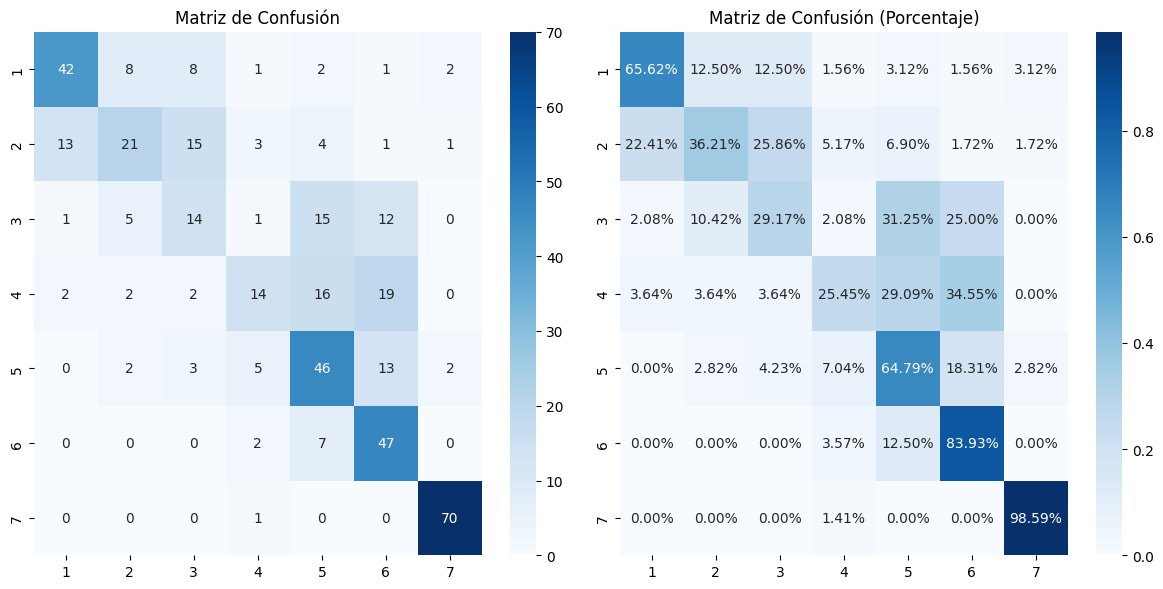

In [9]:
# Definir el modelo de regresión logística multinomial
logistic_model = LogisticRegression(multi_class='multinomial', solver='newton-cg', max_iter=5000, random_state=123)

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Definir el proceso iterativo de búsqueda de hiperparámetros
grid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring='accuracy')

# Entrenar el modelo con los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo encontrado por la búsqueda
best_model = grid_search.best_estimator_

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)
print()

# Evaluar el modelo en los datos de prueba
y_pred = best_model.predict(X_test)

# Imprimir el reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Obtener las etiquetas únicas de y_test
etiquetas_unicas = np.unique(y_test)

# Calcular el total de predicciones por clase
total_por_clase_rf = conf_matrix.sum(axis=1)

# Calcular la matriz de confusión como porcentaje
conf_matrix_porcentaje_rf = conf_matrix / total_por_clase_rf[:, np.newaxis]

# Crear una figura y ejes para la grilla
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Crear el mapa de calor de la matriz de confusión sin normalizar
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=etiquetas_unicas, yticklabels=etiquetas_unicas, ax=axs[0])
axs[0].set_title('Matriz de Confusión')

# Crear el mapa de calor de la matriz de confusión en porcentajes
sns.heatmap(conf_matrix_porcentaje_rf, annot=True, cmap='Blues', fmt='.2%', xticklabels=etiquetas_unicas, yticklabels=etiquetas_unicas, ax=axs[1])
axs[1].set_title('Matriz de Confusión (Porcentaje)')

# Ajustar el diseño de la grilla
plt.tight_layout()

# Mostrar la grilla
plt.show()

In [10]:
# Calcular la precisión global (accuracy)
accuracy = accuracy_score(y_test, y_pred)

# Imprimir la precisión global (accuracy)
print("Precisión Global (Accuracy):", accuracy)

Precisión Global (Accuracy): 0.6004728132387707


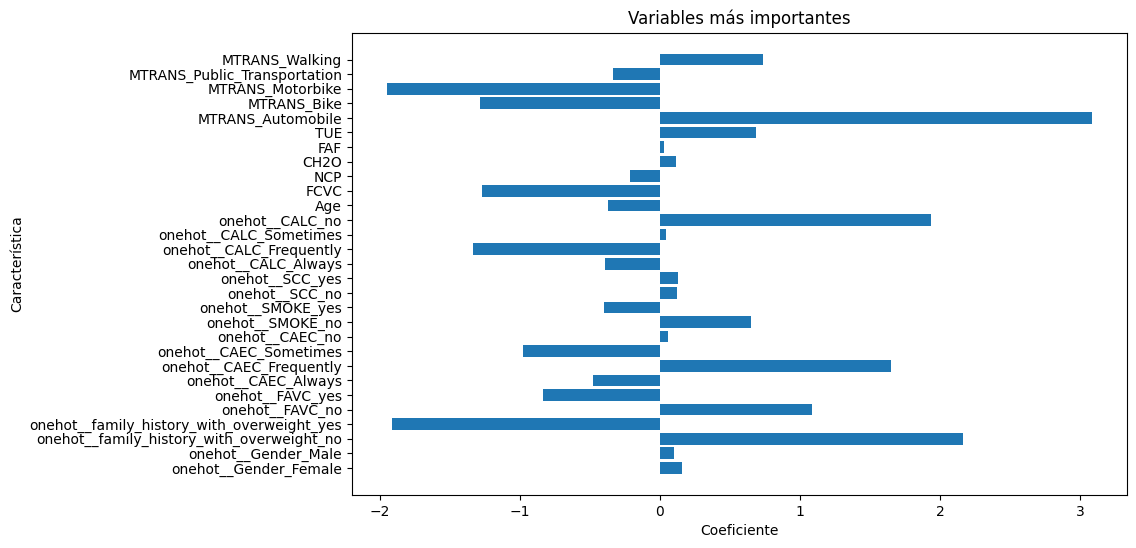

In [11]:
# Obtener los coeficientes del modelo
coeficientes = best_model.coef_

# Obtener los nombres de las características
nombres_caracteristicas = X_train.columns

# Crear un gráfico de barras para visualizar los coeficientes
plt.figure(figsize=(10, 6))
plt.barh(nombres_caracteristicas, coeficientes[0])
plt.xlabel('Coeficiente')
plt.ylabel('Característica')
plt.title('Variables más importantes')
plt.show()

c:\Users\sonya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Precisión del modelo de Random Forest: 0.8226950354609929


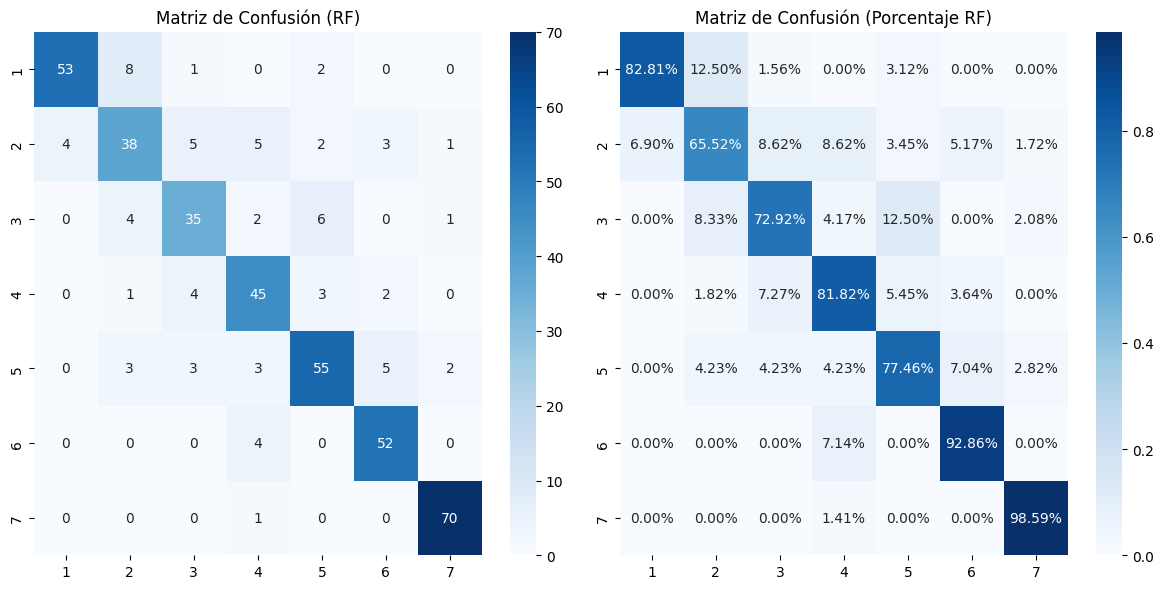

In [12]:
# Establecer la semilla para reproducibilidad
np.random.seed(123)

# Definir las columnas numéricas
columnas_numericas = X_train.select_dtypes(include=['float64', 'int64']).columns

# Construir el pipeline para las características numéricas
pipeline_numerico = Pipeline([
    ('scaler', StandardScaler())
])

# Crear el transformador de columnas
transformador_columnas = ColumnTransformer([
    ('numeric', pipeline_numerico, columnas_numericas)
])

# Aplicar el transformador a X_train y X_test
X_train_procesado = transformador_columnas.fit_transform(X_train)
X_test_procesado = transformador_columnas.transform(X_test)

# Inicializar el modelo de Random Forest
random_forest = RandomForestClassifier(random_state=123)

# Entrenar el modelo
random_forest.fit(X_train_procesado, y_train)

# Predecir en el conjunto de prueba
y_pred = random_forest.predict(X_test_procesado)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo de Random Forest:", accuracy)

# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Calcular el total de predicciones por clase
total_por_clase_rf = conf_matrix.sum(axis=1)

# Calcular la matriz de confusión como porcentaje
conf_matrix_porcentaje_rf = conf_matrix / total_por_clase_rf[:, np.newaxis]

# Crear una figura y ejes para la grilla
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Matriz de confusión sin normalizar
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=etiquetas_unicas, yticklabels=etiquetas_unicas, ax=axs[0])
axs[0].set_title('Matriz de Confusión (RF)')

# Matriz de confusión en porcentajes
sns.heatmap(conf_matrix_porcentaje_rf, annot=True, cmap='Blues', fmt='.2%', xticklabels=etiquetas_unicas, yticklabels=etiquetas_unicas, ax=axs[1])
axs[1].set_title('Matriz de Confusión (Porcentaje RF)')

# Ajustar el diseño de la grilla
plt.tight_layout()

# Mostrar la grilla
plt.show()

In [13]:
# Obtener la importancia de las variables
importancias_variables = random_forest.feature_importances_

# Crear un DataFrame para mostrar las importancias de las variables
df_importancias = pd.DataFrame({'Variable': X_train.columns, 'Importancia': importancias_variables})

# Ordenar el DataFrame por importancia de las variables
df_importancias = df_importancias.sort_values(by='Importancia', ascending=False)

# Imprimir las importancias de las variables
print(df_importancias)

                                      Variable  Importancia
18                                         Age     0.236336
20                                         NCP     0.072462
22                                         FAF     0.070379
19                                        FCVC     0.069985
23                                         TUE     0.056155
21                                        CH2O     0.054821
0                        onehot__Gender_Female     0.046113
16                      onehot__CALC_Sometimes     0.040253
1                          onehot__Gender_Male     0.036387
17                             onehot__CALC_no     0.033575
27                MTRANS_Public_Transportation     0.032292
3   onehot__family_history_with_overweight_yes     0.032050
2    onehot__family_history_with_overweight_no     0.031940
8                       onehot__CAEC_Sometimes     0.030790
7                      onehot__CAEC_Frequently     0.025419
24                           MTRANS_Auto

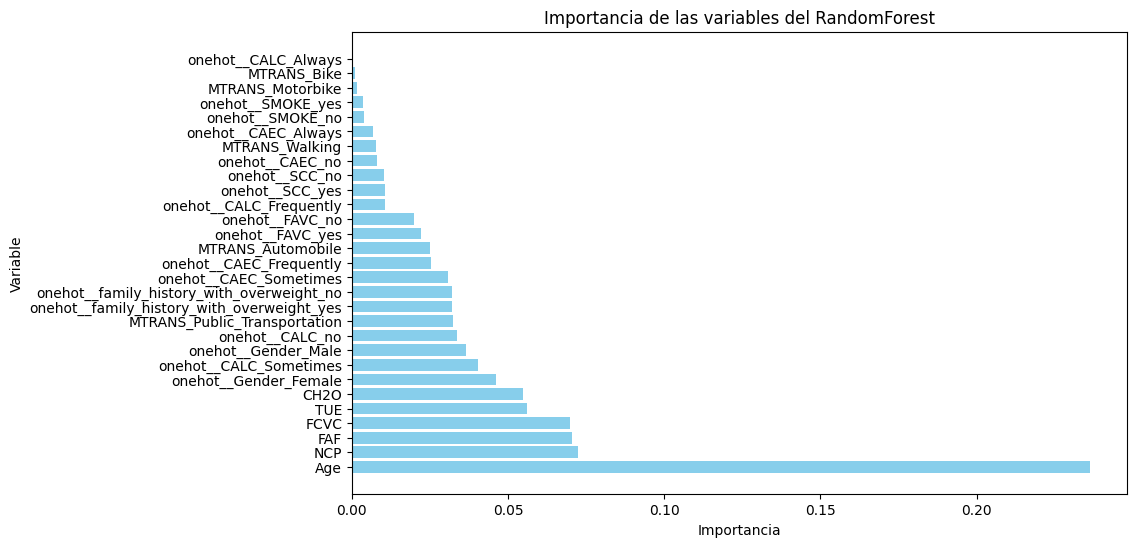

In [14]:
# Crear la figura y los ejes
plt.figure(figsize=(10, 6))

# Graficar las importancias de las variables
plt.barh(df_importancias['Variable'], df_importancias['Importancia'], color='skyblue')

# Agregar etiquetas y título
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.title('Importancia de las variables del RandomForest')

# Mostrar la gráfica
plt.show()